In [1]:
import pandas as pd
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

In [2]:
#read images
data=[]
chars = [i for i in range(48, 48+10)] + [i for i in range(65, 65+26)]
for i in chars:
    img = cv2.imread('dataset/sans/16px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    data.append(np.array(final_img, dtype=np.float32).flatten())


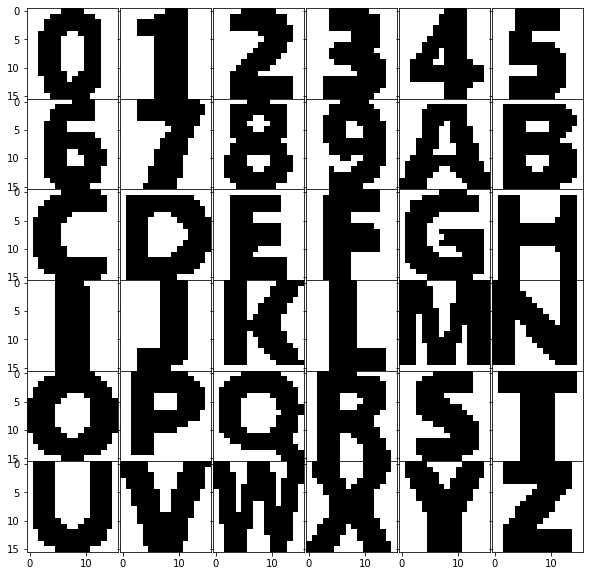

In [3]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(6, 6, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(36):
    axs[i//6, i%6].imshow(data[i].reshape(16, 16), 'gray')    

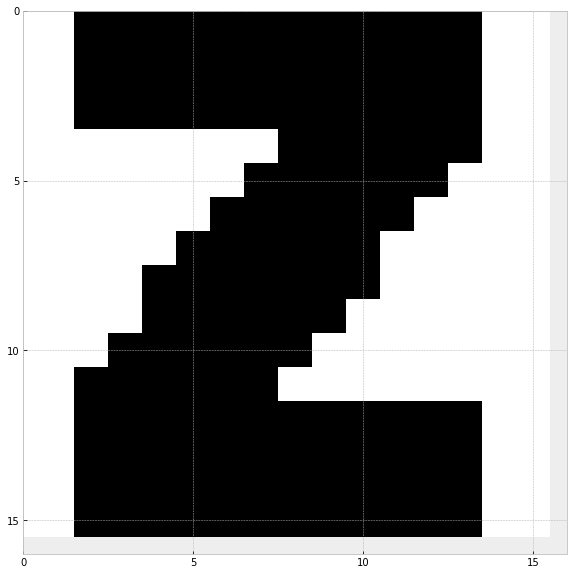

In [4]:
plt.style.use('bmh')
plt.figure(figsize=(10, 10))
plt.xticks(range(0, 16, 5))
plt.ylim(16, 0)
plt.xlim(0, 16)
plt.yticks(range(0, 16, 5))
plt.imshow(data[35].reshape(16, 16), 'gray')

In [5]:
x_data = Variable(torch.Tensor([data]))
y_data = Variable(torch.Tensor([data]))

/var/folders/9n/3xxt38bn37v0q9snx7htdy3r0000gn/T/ipykernel_86942/1365032627.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1635217266490/work/torch/csrc/utils/tensor_new.cpp:201.)
  x_data = Variable(torch.Tensor([data]))


In [25]:
from model import DeepNet
from engine import test, train
ffa = []
fh = []
for epochs in range(0, 1100, 100):
    model = DeepNet(layerSize=[256]+[256]*3+[256])
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    train(data, data, model, criterion, optimizer, epochs)
    pred, err = test(data=data, target=data, model=model)
    ffa += [np.mean(err[0])]
    fh += [np.mean(err[1])]

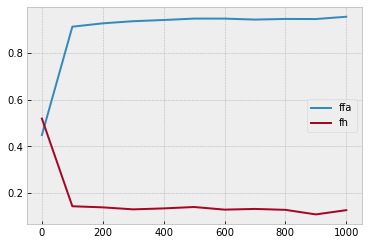

In [26]:
plt.figure()
plt.plot(range(0, 1100, 100), ffa, label='ffa')
plt.plot(range(0, 1100, 100), fh, label='fh')
plt.legend()    

In [29]:
model = DeepNet(layerSize=[256]+[256]*3+[256])
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
train(data, data, model, criterion, optimizer, 200)

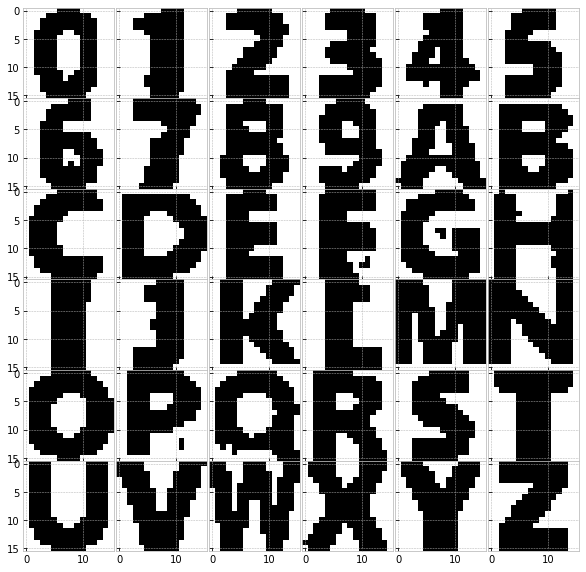

In [30]:
pred, err = test(data=data, target=data, model=model)
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(6, 6, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(36):
    axs[i//6, i%6].imshow(pred[i], 'gray')    

In [10]:
#read images
serif=[]
chars = [i for i in range(48, 48+10)] + [i for i in range(65, 65+26)]
for i in chars:
    img = cv2.imread('dataset/serif/16px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    serif.append(np.array(final_img, dtype=np.float32).flatten())


[0.8776795984523685, 0.8414855833436206, 0.11530196249580696] [0.16333333333333333, 0.18129454753841528, 0.12311627018395117]


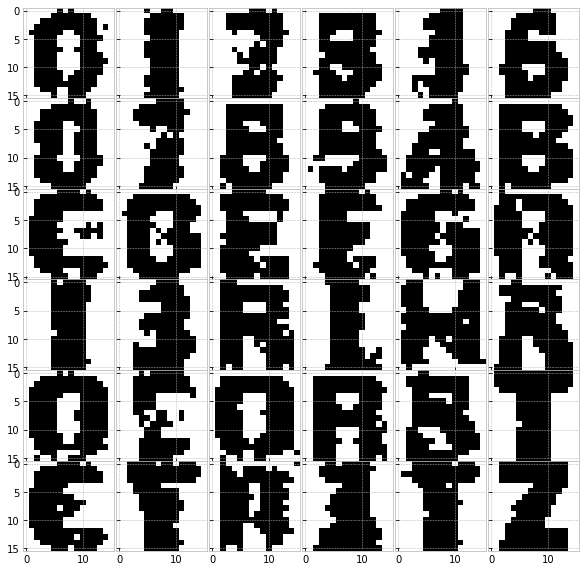

In [11]:
pred, err = test(data=serif, target=data, model=model)
ffa = [np.median(err[0]), np.mean(err[0]), np.std(err[0])]
fh = [np.median(err[1]), np.mean(err[1]), np.std(err[1])]
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(6, 6, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(36):
    axs[i//6, i%6].imshow(pred[i], 'gray')    
print(ffa, fh)

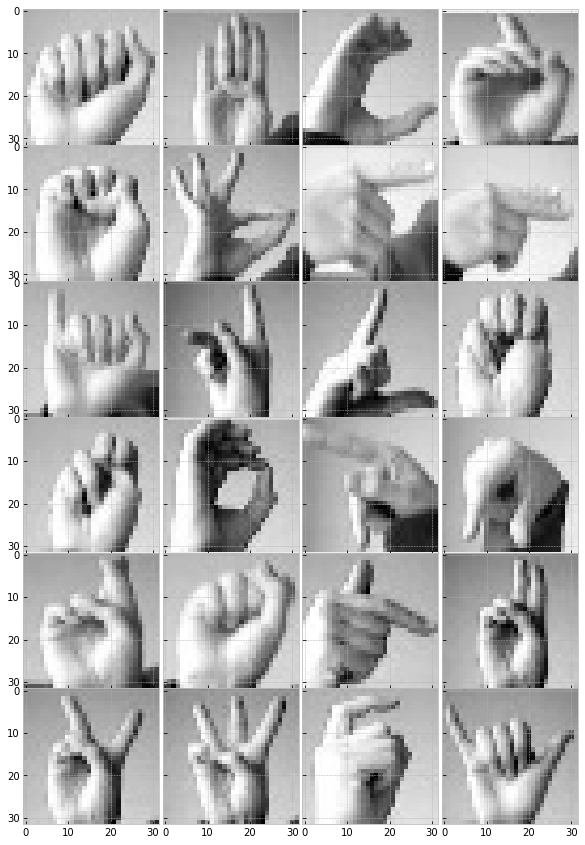

In [35]:
asl = []
asl_targets = []
ach = [i for i in range(65, 65+25)]
ach.remove(ord('J'))
for i in ach:
    img = cv2.imread('dataset/asl/32px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im = np.array(img_gray, dtype=np.float32).flatten()
    im = im/255
    asl.append(im)
    img = cv2.imread('dataset/sans/16px/%s.jpg' %chr(i))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    asl_targets.append(np.array(final_img, dtype=np.float32).flatten())
fig = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(6, 4, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(24):
    axs[i//4, i%4].imshow(asl[i].reshape(32, 32), 'gray')

In [37]:
ffa = []
fh = []
for epochs in range(100, 1100, 100):
    model = DeepNet(layerSize=[1024]+[1024, 512, 256]+[256])
    criterion = torch.nn.MSELoss(size_average = False)
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    train(asl, asl_targets, model, criterion, optimizer, epochs)
    pred, err = test(data=asl, target=asl_targets, model=model)
    ffa += [np.mean(err[0])]
    fh += [np.mean(err[1])]

/Users/shivambang/miniforge3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


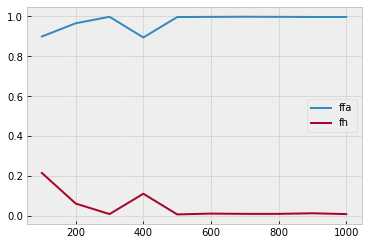

In [38]:
plt.figure()
plt.plot(range(100, 1100, 100), ffa, label='ffa')
plt.plot(range(100, 1100, 100), fh, label='fh')
plt.legend()    

In [41]:
model = DeepNet(layerSize=[1024]+[1024, 512, 256]+[256])
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
train(asl, asl_targets, model, criterion, optimizer, 300)

[1.0, 0.9974987274999648, 0.005796708462368311] [0.0, 0.012093854663576384, 0.015079648580935776]


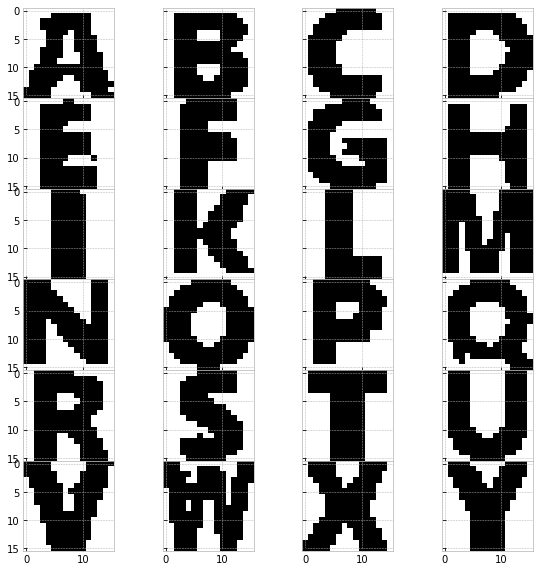

In [42]:
pred, err = test(data=asl, target=asl_targets, model=model)
ffa = [np.median(err[0]), np.mean(err[0]), np.std(err[0])]
fh = [np.median(err[1]), np.mean(err[1]), np.std(err[1])]
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(6, 4, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(24):
    axs[i//4, i%4].imshow(pred[i], 'gray')    
print(ffa, fh)